In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import RFE

In [2]:
data = pd.read_csv('/Users/dongchen/Desktop/churn_data.csv')

# Hypothesis 

The main question you need to answer is: which factors can help us predict if a customer will churn?
The Location, Age Device and the 

In [3]:
data.head()

,Unnamed: 0,CustomerID,Age,Location,Device,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,...,Month_10_Spend,Month_10_Items,Month_10_Support_Calls,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls,Churn
0,0,1,46,US,iOS,756.005761,39,2,582.023075,92,...,280.397827,60,0,700.181510,66,3,382.719682,59,0,1
1,1,2,52,US,iOS,594.838157,59,0,251.269898,33,...,863.000645,89,1,571.331352,28,3,570.203975,89,0,1
2,2,3,43,Canada,Android,453.217405,21,3,124.178946,92,...,858.545990,60,5,198.222684,38,1,187.475764,79,5,1
3,3,4,41,US,iOS,621.453170,95,1,134.362559,46,...,404.590146,59,3,565.395592,78,1,281.415092,63,4,1
4,4,5,41,US,iOS,660.735119,48,5,713.265527,54,...,178.143438,85,1,574.382094,34,2,544.981985,28,2,1


By looking at the column of the data, 'Unnamed' colunm is useless gonna drop it frist.

In [4]:
data = data.drop('Unnamed: 0',axis= 1, inplace= True)


In [5]:
data

In [7]:
data.info()

AttributeError: 'NoneType' object has no attribute 'info'

According to the info, there is no missing value in the dataset. Next let's use descirbe to see the detail of the data

In [ ]:
data.describe(include = 'all')

,CustomerID,Age,Location,Device,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,Month_2_Support_Calls,...,Month_10_Spend,Month_10_Items,Month_10_Support_Calls,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls,Churn
count,10000.00000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
unique,NaN,NaN,4,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Canada,Android,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4258,5736,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,42.698500,NaN,NaN,482.593336,64.657700,2.488800,476.297118,63.118000,2.517400,...,473.630524,58.227900,2.487000,472.671126,56.968900,2.519500,478.629330,56.512600,2.496300,0.70000
std,2886.89568,12.495528,NaN,NaN,237.961476,29.329527,1.711306,237.491820,28.933247,1.703639,...,235.090366,25.909251,1.721083,234.288930,25.615119,1.702266,233.135282,25.263995,1.713674,0.45828
min,1.00000,20.000000,NaN,NaN,45.147050,12.000000,0.000000,46.283232,12.000000,0.000000,...,45.784922,12.000000,0.000000,45.139863,12.000000,0.000000,45.093583,12.000000,0.000000,0.00000
25%,2500.75000,32.000000,NaN,NaN,275.978779,39.000000,1.000000,268.427326,38.000000,1.000000,...,268.470286,36.000000,1.000000,269.432095,35.000000,1.000000,276.507055,35.000000,1.000000,0.00000
50%,5000.50000,43.000000,NaN,NaN,482.173250,65.000000,2.000000,474.442784,63.000000,3.000000,...,472.391691,58.000000,2.000000,472.530676,57.000000,3.000000,481.872558,56.000000,3.000000,1.00000
75%,7500.25000,53.000000,NaN,NaN,688.898992,90.000000,4.000000,680.824377,88.000000,4.000000,...,680.923305,80.000000,4.000000,673.599392,78.000000,4.000000,681.397961,77.000000,4.000000,1.00000


In [ ]:
data['Location'].unique()

array(['US', 'Canada', 'Great Britain', 'Australia'], dtype=object)

In [ ]:
data['Device'].unique()

array(['iOS', 'Android'], dtype=object)

The average age of the customer is 43, max is 65 min is 20. 

Location(categorical variable): ['US', 'Canada', 'Great Britain', 'Australia']

Device(categorical variable) : ['iOS', 'Android']

There is no missing value to filled so in the data cleaning session we will check the outliers. Because of we have four countires and customers from each coutries might effect by different feature. It is better to analyze those 4 countries separatly.

In [ ]:
# US customer data
us_data = data[data['Location']=='US']
# Canada customer data
ca_data = data[data['Location']=='Canada']
# Great Britain customer data
gb_data = data[data['Location']=='Great Britain']
# Australia customer data
au_data = data[data['Location']=='Australia']

print(us_data['CustomerID'].count)
print(ca_data['CustomerID'].count)
print(gb_data['CustomerID'].count)
print(au_data['CustomerID'].count)

<bound method Series.count of 0          1
1          2
3          4
4          5
9         10
        ... 
9981    9982
9987    9988
9993    9994
9994    9995
9997    9998
Name: CustomerID, Length: 4255, dtype: int64>
<bound method Series.count of 2           3
5           6
6           7
7           8
8           9
        ...  
9986     9987
9988     9989
9990     9991
9991     9992
9999    10000
Name: CustomerID, Length: 4258, dtype: int64>
<bound method Series.count of 7001    7002
7006    7007
7008    7009
7018    7019
7021    7022
        ... 
9975    9976
9977    9978
9992    9993
9995    9996
9996    9997
Name: CustomerID, Length: 762, dtype: int64>
<bound method Series.count of 7004    7005
7014    7015
7017    7018
7019    7020
7022    7023
        ... 
9968    9969
9974    9975
9982    9983
9989    9990
9998    9999
Name: CustomerID, Length: 725, dtype: int64>


Majority of the customer of this website are in Canada and U.S which is North America 
They have 725 customer from AUS and 762 customer from GB which is 14 percent of the total customers.


CustomerID                4255
Age                       4255
Location                  4255
Device                    4255
Month_1_Spend             4255
Month_1_Items             4255
Month_1_Support_Calls     4255
Month_2_Spend             4255
Month_2_Items             4255
Month_2_Support_Calls     4255
Month_3_Spend             4255
Month_3_Items             4255
Month_3_Support_Calls     4255
Month_4_Spend             4255
Month_4_Items             4255
Month_4_Support_Calls     4255
Month_5_Spend             4255
Month_5_Items             4255
Month_5_Support_Calls     4255
Month_6_Spend             4255
Month_6_Items             4255
Month_6_Support_Calls     4255
Month_7_Spend             4255
Month_7_Items             4255
Month_7_Support_Calls     4255
Month_8_Spend             4255
Month_8_Items             4255
Month_8_Support_Calls     4255
Month_9_Spend             4255
Month_9_Items             4255
Month_9_Support_Calls     4255
Month_10_Spend            4255
Month_10

In [ ]:
us_data.describe(include = 'all')

,CustomerID,Age,Location,Device,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,Month_2_Support_Calls,...,Month_10_Spend,Month_10_Items,Month_10_Support_Calls,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls,Churn
count,4255.000000,4255.000000,4255,4255,4255.000000,4255.000000,4255.000000,4255.000000,4255.000000,4255.000000,...,4255.000000,4255.000000,4255.000000,4255.000000,4255.000000,4255.000000,4255.000000,4255.000000,4255.000000,4255.000000
unique,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,US,Android,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4255,2594,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4378.508108,42.075911,NaN,NaN,488.943134,64.893302,2.483901,481.631673,63.693772,2.501058,...,476.446033,57.762397,2.484841,478.264282,55.997885,2.522209,475.557503,55.363572,2.489307,0.823737
std,2663.337906,12.515101,NaN,NaN,234.536356,29.246065,1.690751,235.774089,28.889378,1.706327,...,233.301331,25.216313,1.716425,232.274963,24.790030,1.711136,230.704779,24.073068,1.714129,0.381089
min,1.000000,20.000000,NaN,NaN,50.741459,12.000000,0.000000,46.831696,12.000000,0.000000,...,45.784922,12.000000,0.000000,45.139863,12.000000,0.000000,45.093583,12.000000,0.000000,0.000000
25%,2143.500000,31.000000,NaN,NaN,290.405816,40.000000,1.000000,278.215371,38.000000,1.000000,...,271.548255,36.000000,1.000000,280.103972,35.000000,1.000000,274.179900,35.000000,1.000000,1.000000
50%,4225.000000,42.000000,NaN,NaN,483.595200,65.000000,2.000000,479.735177,64.000000,3.000000,...,479.220354,58.000000,2.000000,478.789094,56.000000,3.000000,475.577265,55.000000,3.000000,1.000000
75%,6403.000000,53.000000,NaN,NaN,693.912171,90.000000,4.000000,682.931985,89.000000,4.000000,...,679.763471,79.000000,4.000000,679.606879,77.000000,4.000000,679.054080,75.000000,4.000000,1.000000


There are 4225 customer from US.
Most of the user in US used Android devices

In [ ]:
data.columns

Index(['CustomerID', 'Age', 'Location', 'Device', 'Month_1_Spend',
       'Month_1_Items', 'Month_1_Support_Calls', 'Month_2_Spend',
       'Month_2_Items', 'Month_2_Support_Calls', 'Month_3_Spend',
       'Month_3_Items', 'Month_3_Support_Calls', 'Month_4_Spend',
       'Month_4_Items', 'Month_4_Support_Calls', 'Month_5_Spend',
       'Month_5_Items', 'Month_5_Support_Calls', 'Month_6_Spend',
       'Month_6_Items', 'Month_6_Support_Calls', 'Month_7_Spend',
       'Month_7_Items', 'Month_7_Support_Calls', 'Month_8_Spend',
       'Month_8_Items', 'Month_8_Support_Calls', 'Month_9_Spend',
       'Month_9_Items', 'Month_9_Support_Calls', 'Month_10_Spend',
       'Month_10_Items', 'Month_10_Support_Calls', 'Month_11_Spend',
       'Month_11_Items', 'Month_11_Support_Calls', 'Month_12_Spend',
       'Month_12_Items', 'Month_12_Support_Calls', 'Churn'],
      dtype='object')

<Axes: xlabel='Churn', ylabel='Month_12_Spend'>

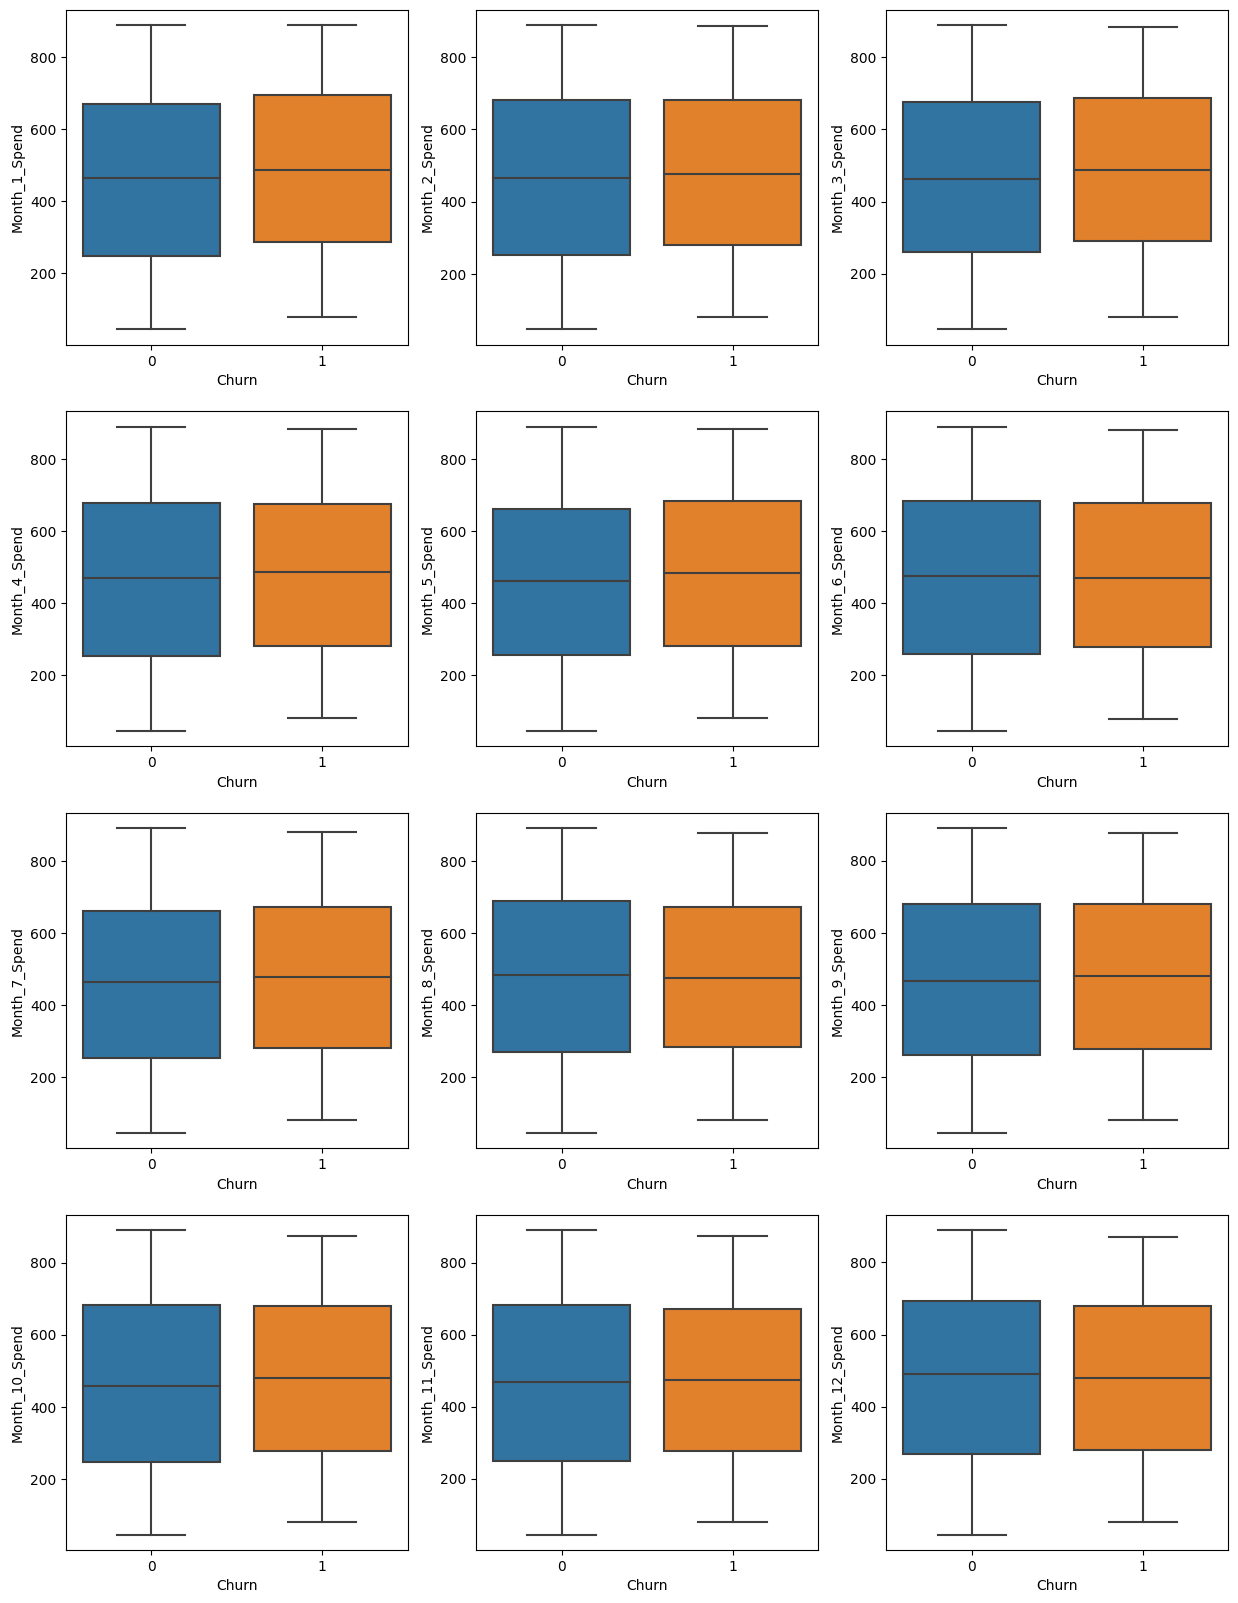

In [ ]:
fig, ([ax1, ax2, ax3],[ax4,ax5,ax6],[ax7,ax8,ax9],[ax10,ax11,ax12]) = plt.subplots(4,3, figsize=(15,20))
sns.boxplot(x='Churn',y='Month_1_Spend', data=data, ax=ax1)
sns.boxplot(x='Churn',y='Month_2_Spend',data=data, ax=ax2)
sns.boxplot(x='Churn',y='Month_3_Spend', data=data, ax=ax3)
sns.boxplot(x='Churn',y='Month_4_Spend', data=data, ax=ax4)
sns.boxplot(x='Churn',y='Month_5_Spend', data=data, ax=ax5)
sns.boxplot(x='Churn',y='Month_6_Spend', data=data, ax=ax6)
sns.boxplot(x='Churn',y='Month_7_Spend', data=data, ax=ax7)
sns.boxplot(x='Churn',y='Month_8_Spend', data=data, ax=ax8)
sns.boxplot(x='Churn',y='Month_9_Spend', data=data, ax=ax9)
sns.boxplot(x='Churn',y='Month_10_Spend', data=data, ax=ax10)
sns.boxplot(x='Churn',y='Month_11_Spend', data=data, ax=ax11)
sns.boxplot(x='Churn',y='Month_12_Spend', data=data, ax=ax12)


From the boxplot there is no significant connection between chunk and the monthly spend from 1 to 12.
The 1 to 12 monthly spend is pretty stable with no outliers.
The monstly spend did not have much changes from month to month. 

<Axes: xlabel='Churn', ylabel='Month_12_Items'>

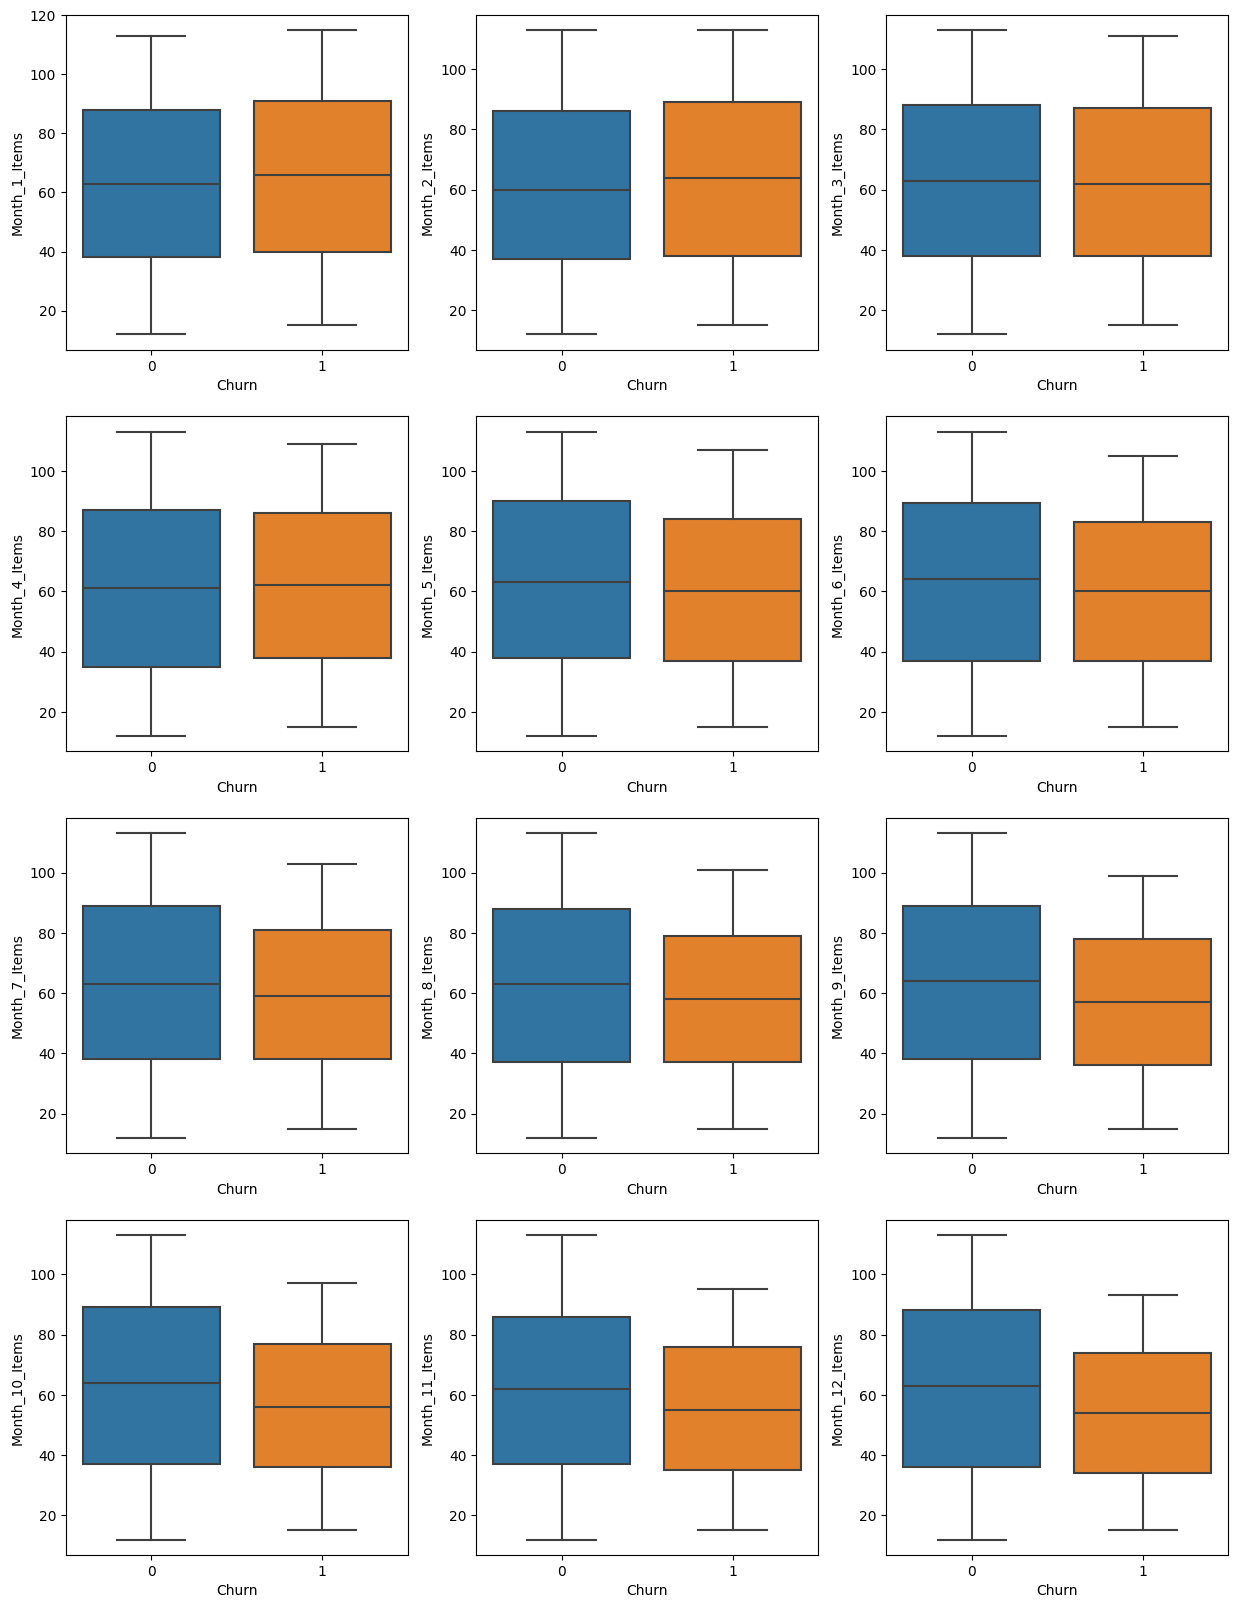

In [ ]:
fig, ([ax1, ax2, ax3],[ax4,ax5,ax6],[ax7,ax8,ax9],[ax10,ax11,ax12]) = plt.subplots(4,3, figsize=(15,20))
sns.boxplot(x='Churn',y='Month_1_Items', data=data, ax=ax1)
sns.boxplot(x='Churn',y='Month_2_Items',data=data, ax=ax2)
sns.boxplot(x='Churn',y='Month_3_Items', data=data, ax=ax3)
sns.boxplot(x='Churn',y='Month_4_Items', data=data, ax=ax4)
sns.boxplot(x='Churn',y='Month_5_Items', data=data, ax=ax5)
sns.boxplot(x='Churn',y='Month_6_Items', data=data, ax=ax6)
sns.boxplot(x='Churn',y='Month_7_Items', data=data, ax=ax7)
sns.boxplot(x='Churn',y='Month_8_Items', data=data, ax=ax8)
sns.boxplot(x='Churn',y='Month_9_Items', data=data, ax=ax9)
sns.boxplot(x='Churn',y='Month_10_Items', data=data, ax=ax10)
sns.boxplot(x='Churn',y='Month_11_Items', data=data, ax=ax11)
sns.boxplot(x='Churn',y='Month_12_Items', data=data, ax=ax12)

According to this graph we could see the at the frist few months the customers who churn purchase same or bit more number of items than the customer who didnt churn. However, after 4 month the customers who chunks purchase less than the customer who did not churn.
That is to said number of item purchase have significant relations to predict if a customer will churn or not.

<Axes: xlabel='Churn', ylabel='Month_12_Support_Calls'>

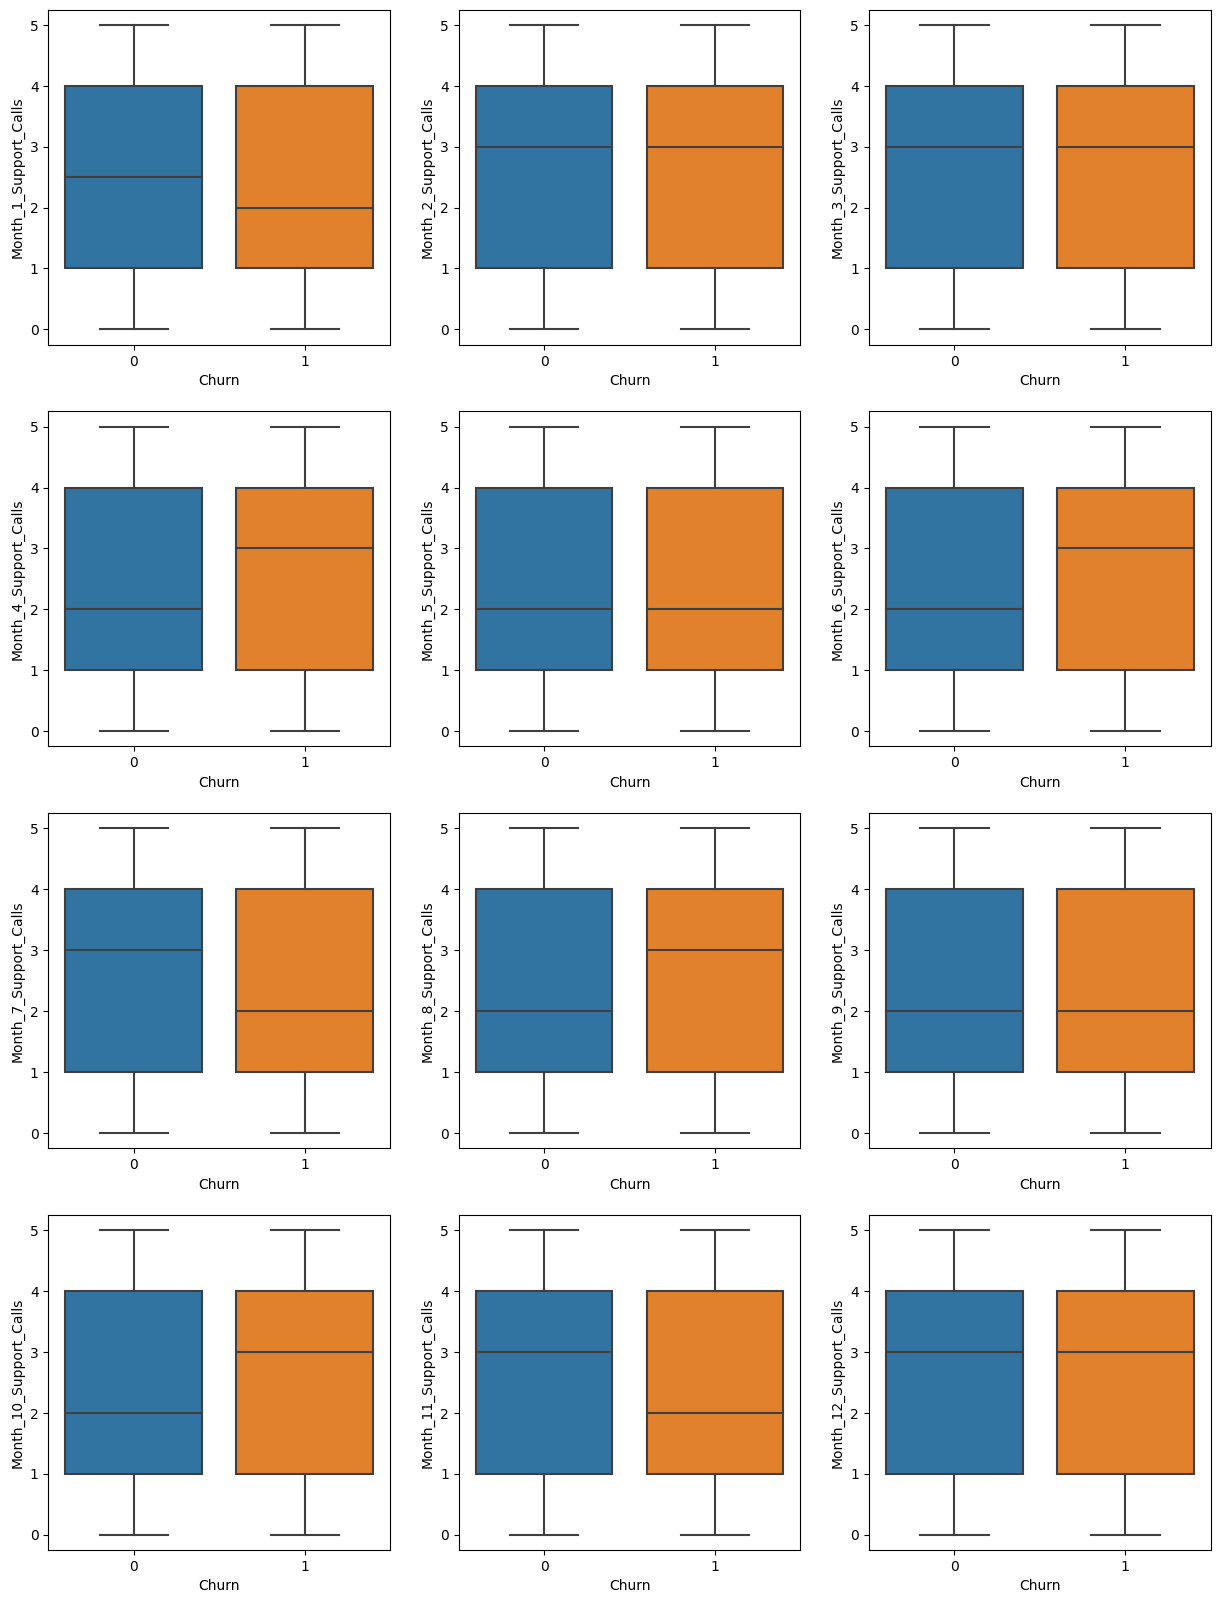

In [ ]:
fig, ([ax1, ax2, ax3],[ax4,ax5,ax6],[ax7,ax8,ax9],[ax10,ax11,ax12]) = plt.subplots(4,3, figsize=(15,20))
sns.boxplot(x='Churn',y='Month_1_Support_Calls', data=data, ax=ax1)
sns.boxplot(x='Churn',y='Month_2_Support_Calls',data=data, ax=ax2)
sns.boxplot(x='Churn',y='Month_3_Support_Calls', data=data, ax=ax3)
sns.boxplot(x='Churn',y='Month_4_Support_Calls', data=data, ax=ax4)
sns.boxplot(x='Churn',y='Month_5_Support_Calls', data=data, ax=ax5)
sns.boxplot(x='Churn',y='Month_6_Support_Calls', data=data, ax=ax6)
sns.boxplot(x='Churn',y='Month_7_Support_Calls', data=data, ax=ax7)
sns.boxplot(x='Churn',y='Month_8_Support_Calls', data=data, ax=ax8)
sns.boxplot(x='Churn',y='Month_9_Support_Calls', data=data, ax=ax9)
sns.boxplot(x='Churn',y='Month_10_Support_Calls', data=data, ax=ax10)
sns.boxplot(x='Churn',y='Month_11_Support_Calls', data=data, ax=ax11)
sns.boxplot(x='Churn',y='Month_12_Support_Calls', data=data, ax=ax12)

The monthly support call from 1 to 12 stay between 1 to 4 calls.
There is no outliers for each monthly support call.
But for customer who churn the average median of support call is higher than the customer who didnt churn.

SO montly support call might have a significant relation to predict if a customer gonna churn or not.

<Axes: xlabel='Churn', ylabel='Age'>

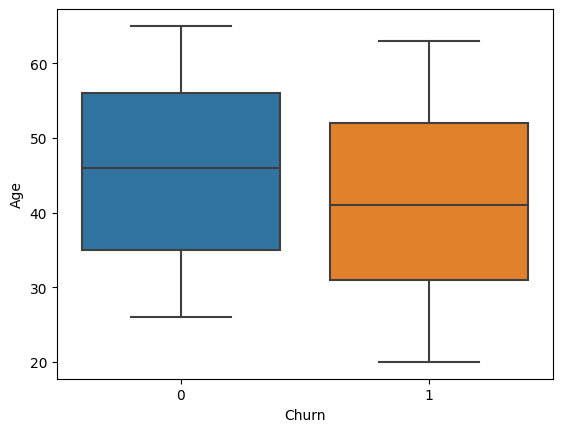

In [ ]:
sns.boxplot(x='Churn',y='Age', data=data)

In [ ]:
data

,CustomerID,Age,Location,Device,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,Month_2_Support_Calls,...,Month_10_Spend,Month_10_Items,Month_10_Support_Calls,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls,Churn
0,1,46,US,iOS,756.005761,39,2,582.023075,92,2,...,280.397827,60,0,700.181510,66,3,382.719682,59,0,1
1,2,52,US,iOS,594.838157,59,0,251.269898,33,2,...,863.000645,89,1,571.331352,28,3,570.203975,89,0,1
2,3,43,Canada,Android,453.217405,21,3,124.178946,92,0,...,858.545990,60,5,198.222684,38,1,187.475764,79,5,1
3,4,41,US,iOS,621.453170,95,1,134.362559,46,5,...,404.590146,59,3,565.395592,78,1,281.415092,63,4,1
4,5,41,US,iOS,660.735119,48,5,713.265527,54,2,...,178.143438,85,1,574.382094,34,2,544.981985,28,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,35,Great Britain,iOS,496.165324,84,1,735.148231,60,2,...,708.936256,77,4,672.755957,23,5,710.675753,60,4,0
9996,9997,59,Great Britain,iOS,138.836616,76,3,673.599667,52,4,...,736.393247,57,4,379.113761,75,4,870.230372,15,3,0
9997,9998,45,US,iOS,533.289217,106,4,367.139990,41,1,...,567.421148,50,3,633.113010,89,5,624.403650,35,4,0
9998,9999,58,Australia,iOS,684.746137,70,0,751.149320,105,4,...,239.675846,32,5,103.703552,97,5,731.775049,28,4,0


## Exploring Catogorical variables

Now let see the relation of categorical variable with churn

In [ ]:
data.groupby(['Churn','Location'])['CustomerID'].count().unstack()

Location,Australia,Canada,Great Britain,US
Churn,,,,
0,725.0,763.0,762.0,750.0
1,NaN,3495.0,NaN,3505.0


From this we could find out, the customer who from Australia and Great Britain  they all churn.
The customer in the north America has less chance to churn.
So we could use this as a new catgrorical variable to create a 'In North America', to define if the customer located in north america or not.

In [ ]:
device=data.groupby(['Churn','Device'])['CustomerID'].count().unstack()
device

Device,Android,iOS
Churn,,
0,896,2104
1,4840,2160


From the chart we could see, Most of android user churn, how ever we didnt see any bais in the android users.

In [ ]:
data.columns

Index(['CustomerID', 'Age', 'Location', 'Device', 'Month_1_Spend',
       'Month_1_Items', 'Month_1_Support_Calls', 'Month_2_Spend',
       'Month_2_Items', 'Month_2_Support_Calls', 'Month_3_Spend',
       'Month_3_Items', 'Month_3_Support_Calls', 'Month_4_Spend',
       'Month_4_Items', 'Month_4_Support_Calls', 'Month_5_Spend',
       'Month_5_Items', 'Month_5_Support_Calls', 'Month_6_Spend',
       'Month_6_Items', 'Month_6_Support_Calls', 'Month_7_Spend',
       'Month_7_Items', 'Month_7_Support_Calls', 'Month_8_Spend',
       'Month_8_Items', 'Month_8_Support_Calls', 'Month_9_Spend',
       'Month_9_Items', 'Month_9_Support_Calls', 'Month_10_Spend',
       'Month_10_Items', 'Month_10_Support_Calls', 'Month_11_Spend',
       'Month_11_Items', 'Month_11_Support_Calls', 'Month_12_Spend',
       'Month_12_Items', 'Month_12_Support_Calls', 'Churn'],
      dtype='object')

## Conclusion of EDA 
The variable that might significant to the 'Churn' are 
'Age', 
'Device', 
'Location',
'Monthly Purchase Item',
'Monthly support calls'

# Data Cleaning

Accoridng to the EDA of numeric variable and categroical variable and the info and describe of the whole dataset.
We find out there are no outliers in the numeric dataset and no missing value in the dataset so we decide only drop the 'Unamed: 0' column and do not do any othe data cleaning method.

# Feature Engineering

In Feature engineering we will:

1. Splite the age into 3 group of category
2. Creat a new dummy variable 'In North America' to classify if the customer are from north america or not.

The monthly support call and the monthly spend and device those variable will use pipline to Scaling or turn into dummies variable.

In [ ]:
#age to age range
def age(x):
    if x < 30 :
        return 'young adult'
    elif 30 <x < 50:
        return 'middle age'
    else :
     return 'senior'

#apply function to data 
data['age_range'] = data['Age'].apply(age)
data

,CustomerID,Age,Location,Device,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,Month_2_Support_Calls,...,Month_10_Items,Month_10_Support_Calls,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls,Churn,age_range
0,1,46,US,iOS,756.005761,39,2,582.023075,92,2,...,60,0,700.181510,66,3,382.719682,59,0,1,middle age
1,2,52,US,iOS,594.838157,59,0,251.269898,33,2,...,89,1,571.331352,28,3,570.203975,89,0,1,senior
2,3,43,Canada,Android,453.217405,21,3,124.178946,92,0,...,60,5,198.222684,38,1,187.475764,79,5,1,middle age
3,4,41,US,iOS,621.453170,95,1,134.362559,46,5,...,59,3,565.395592,78,1,281.415092,63,4,1,middle age
4,5,41,US,iOS,660.735119,48,5,713.265527,54,2,...,85,1,574.382094,34,2,544.981985,28,2,1,middle age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,35,Great Britain,iOS,496.165324,84,1,735.148231,60,2,...,77,4,672.755957,23,5,710.675753,60,4,0,middle age
9996,9997,59,Great Britain,iOS,138.836616,76,3,673.599667,52,4,...,57,4,379.113761,75,4,870.230372,15,3,0,senior
9997,9998,45,US,iOS,533.289217,106,4,367.139990,41,1,...,50,3,633.113010,89,5,624.403650,35,4,0,middle age
9998,9999,58,Australia,iOS,684.746137,70,0,751.149320,105,4,...,32,5,103.703552,97,5,731.775049,28,4,0,senior


<Axes: xlabel='Age', ylabel='Count'>

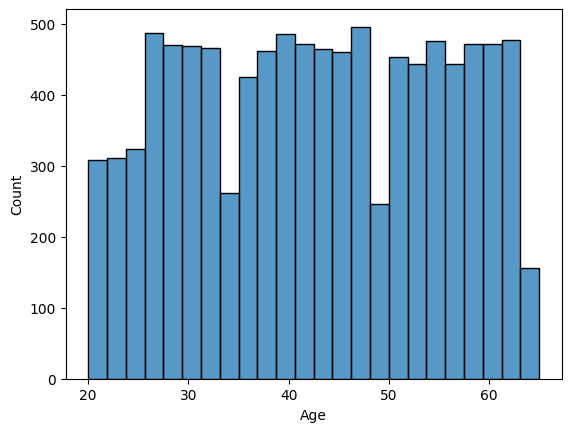

In [ ]:
sns.histplot(data['Age'])

In [ ]:
#location to in NORTH AMERICA
def loc(x):
    if x == 'US' or x== 'Canada' :
        return 1
    else :
     return 0

#apply function to data 
data['In NA'] = data['Location'].apply(loc)
data

,CustomerID,Age,Location,Device,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,Month_2_Support_Calls,...,Month_10_Support_Calls,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls,Churn,age_range,In NA
0,1,46,US,iOS,756.005761,39,2,582.023075,92,2,...,0,700.181510,66,3,382.719682,59,0,1,middle age,1
1,2,52,US,iOS,594.838157,59,0,251.269898,33,2,...,1,571.331352,28,3,570.203975,89,0,1,senior,1
2,3,43,Canada,Android,453.217405,21,3,124.178946,92,0,...,5,198.222684,38,1,187.475764,79,5,1,middle age,1
3,4,41,US,iOS,621.453170,95,1,134.362559,46,5,...,3,565.395592,78,1,281.415092,63,4,1,middle age,1
4,5,41,US,iOS,660.735119,48,5,713.265527,54,2,...,1,574.382094,34,2,544.981985,28,2,1,middle age,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,35,Great Britain,iOS,496.165324,84,1,735.148231,60,2,...,4,672.755957,23,5,710.675753,60,4,0,middle age,0
9996,9997,59,Great Britain,iOS,138.836616,76,3,673.599667,52,4,...,4,379.113761,75,4,870.230372,15,3,0,senior,0
9997,9998,45,US,iOS,533.289217,106,4,367.139990,41,1,...,3,633.113010,89,5,624.403650,35,4,0,middle age,1
9998,9999,58,Australia,iOS,684.746137,70,0,751.149320,105,4,...,5,103.703552,97,5,731.775049,28,4,0,senior,0


In [ ]:
data['Location'].unique()

array(['US', 'Canada', 'Great Britain', 'Australia'], dtype=object)

# Modeling

Because this is a binary decison question to predict if the customer will churn or not. 
I chose to use logistic regression, knn, svc, descion tree and navie bayes to predict the model

In addition, for age and device and location those three variable are inbalance so it is more acctrat to use f1 as the mertics.

In [ ]:
data.columns

Index(['CustomerID', 'Age', 'Location', 'Device', 'Month_1_Spend',
       'Month_1_Items', 'Month_1_Support_Calls', 'Month_2_Spend',
       'Month_2_Items', 'Month_2_Support_Calls', 'Month_3_Spend',
       'Month_3_Items', 'Month_3_Support_Calls', 'Month_4_Spend',
       'Month_4_Items', 'Month_4_Support_Calls', 'Month_5_Spend',
       'Month_5_Items', 'Month_5_Support_Calls', 'Month_6_Spend',
       'Month_6_Items', 'Month_6_Support_Calls', 'Month_7_Spend',
       'Month_7_Items', 'Month_7_Support_Calls', 'Month_8_Spend',
       'Month_8_Items', 'Month_8_Support_Calls', 'Month_9_Spend',
       'Month_9_Items', 'Month_9_Support_Calls', 'Month_10_Spend',
       'Month_10_Items', 'Month_10_Support_Calls', 'Month_11_Spend',
       'Month_11_Items', 'Month_11_Support_Calls', 'Month_12_Spend',
       'Month_12_Items', 'Month_12_Support_Calls', 'Churn', 'age_range',
       'In NA'],
      dtype='object')

In [ ]:
#Build Pipline
cat_columns = ['age_range','In NA','Device']
num_columns = ['Month_1_Support_Calls','Month_2_Support_Calls','Month_3_Support_Calls','Month_4_Support_Calls','Month_5_Support_Calls','Month_6_Support_Calls'
               ,'Month_7_Support_Calls','Month_8_Support_Calls','Month_9_Support_Calls','Month_10_Support_Calls','Month_11_Support_Calls','Month_12_Support_Calls',
                'Month_1_Items', 'Month_2_Items', 'Month_3_Items', 'Month_4_Items', 'Month_5_Items', 'Month_6_Items', 'Month_7_Items', 'Month_8_Items',
                 'Month_9_Items', 'Month_10_Items', 'Month_11_Items', 'Month_12_Items']

cat_transformer = OneHotEncoder(handle_unknown='ignore')
num_transformer = StandardScaler()
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, cat_columns),
                                                 ('num', num_transformer, num_columns)])

In [ ]:
x= preprocessor.fit_transform(data[cat_columns + num_columns] )
y = data['Churn']

In [ ]:
#split the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2 , random_state=1234)

In [ ]:
# Build the model
log = LogisticRegression(random_state= 1234)
nb = GaussianNB()
knn = KNeighborsClassifier() 
svc = SVC(kernel= 'linear',random_state= 1234)
dt = DecisionTreeClassifier(random_state=123, max_depth=6)

In [ ]:
# Cross-Validation 
cv_scores_log = cross_val_score(log, x, y, cv=10, scoring='f1').mean()
cv_scores_nb = cross_val_score(nb, x, y, cv=10, scoring='f1').mean()
cv_scores_knn = cross_val_score(knn, x, y, cv=10, scoring='f1').mean()
cv_scores_svc = cross_val_score(svc, x, y, cv=10, scoring='f1').mean()
cv_scores_dt = cross_val_score(dt, x, y, cv=10, scoring='f1').mean()

#Print out the mean f1 score to chose the best one
print("Cross-validation scores for Logistic Regression: ", cv_scores_log)
print("Cross-validation scores for Navie Bayes: ", cv_scores_nb)
print("Cross-validation scores for KNN: ", cv_scores_knn)
print("Cross-validation scores for SVC: ", cv_scores_svc)
print("Cross-validation scores for Decision Tree: ", cv_scores_dt)

Cross-validation scores for Logistic Regression:  0.9087864875076599
Cross-validation scores for Navie Bayes:  0.9024891167679844
Cross-validation scores for KNN:  0.8459276399417037
Cross-validation scores for SVC:  0.9024891167679844
Cross-validation scores for Decision Tree:  0.9553478953244255


Accroding to the agerage f1 socre I think decision tree is the most accurate model.

# Model tuning 

In [ ]:
# Hyperparameter tuning
# select parameters
param_dt = {'max_depth': list(range(1, 10)),
          'min_samples_leaf': list(range(1, 10)),
          'max_features': ['auto', 'sqrt', 'log2']}
# Define the models
dt = DecisionTreeClassifier()

# If your computer doesn't have much memory
randomsearch_dt = RandomizedSearchCV(dt, param_dt, cv=10, n_iter= 15, scoring='f1')

# Fit models

randomsearch_dt.fit(x_train, y_train)



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_iter=15,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,
                                                      9],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9]},
                   scoring='f1')

In [ ]:
# Get the best parameters
print("Best parameters for dt - randomsearch: ", randomsearch_dt.best_params_)

Best parameters for dt - randomsearch:  {'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 8}


In [ ]:
# Apply the best parameters
dt_best = DecisionTreeClassifier(min_samples_leaf=4, max_features= 'sqrt', max_depth= 8)
dt_best.fit(x_train, y_train)
pre_dt_best = dt_best.predict(x_test)


In [ ]:

print(" F1: ", f1_score(y_test, pre_dt_best))
print(" precision: ", precision_score(y_test, pre_dt_best))
print("recall: ", recall_score(y_test, pre_dt_best))
print(" accuracy: ", accuracy_score(y_test, pre_dt_best))

optimal threshold F1:  0.951682772409197
optimal threshold precision:  0.9078194532739987
optimal threshold recall:  1.0
optimal threshold accuracy:  0.9275


Accoridng to the data ana